In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


# Filter out warnings
import warnings 
warnings.filterwarnings('ignore')

# To style plots
plt.style.use('fivethirtyeight')

# Cycle the colors
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# For QQPlots
from statsmodels.graphics.gofplots import qqplot

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

#### EDA

Text(0, 0.5, 'Sale Price')

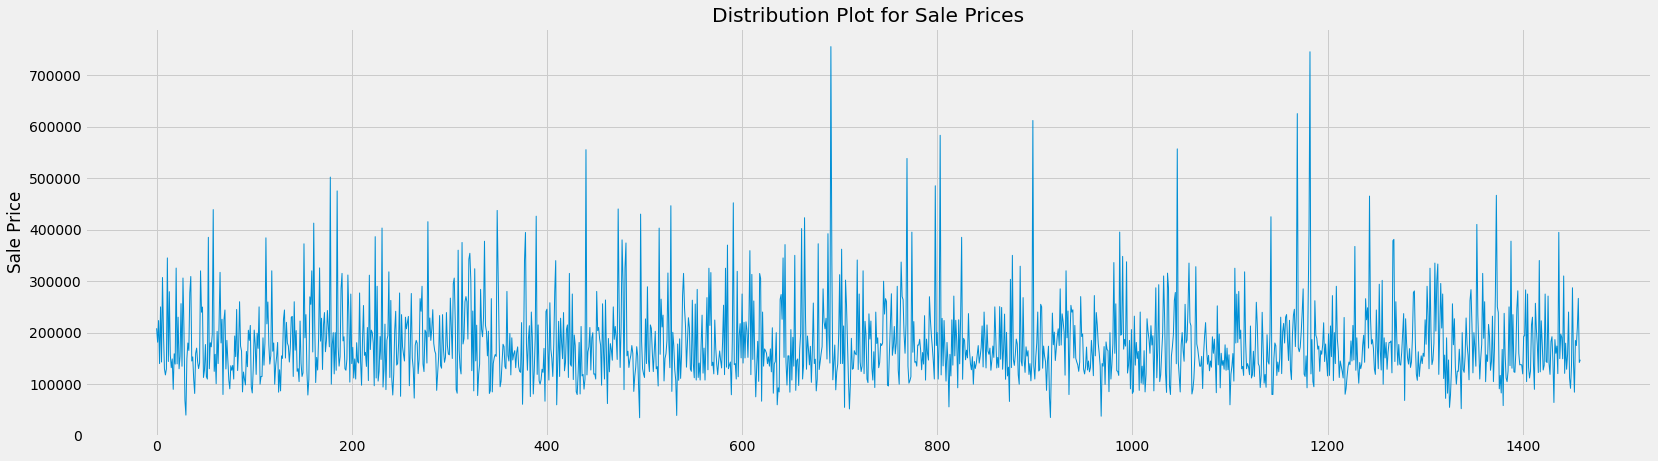

In [5]:
plt.figure(figsize=(25, 7))
plt.plot(train.SalePrice, linewidth=1, color=next(color_cycle))
plt.title('Distribution Plot for Sale Prices')
plt.ylabel('Sale Price')

    The above plot shows the distribution of sales price according to the index value.
    Let's sort the values according to sales price and re-draw the plot.

Text(0, 0.5, 'Sales Price')

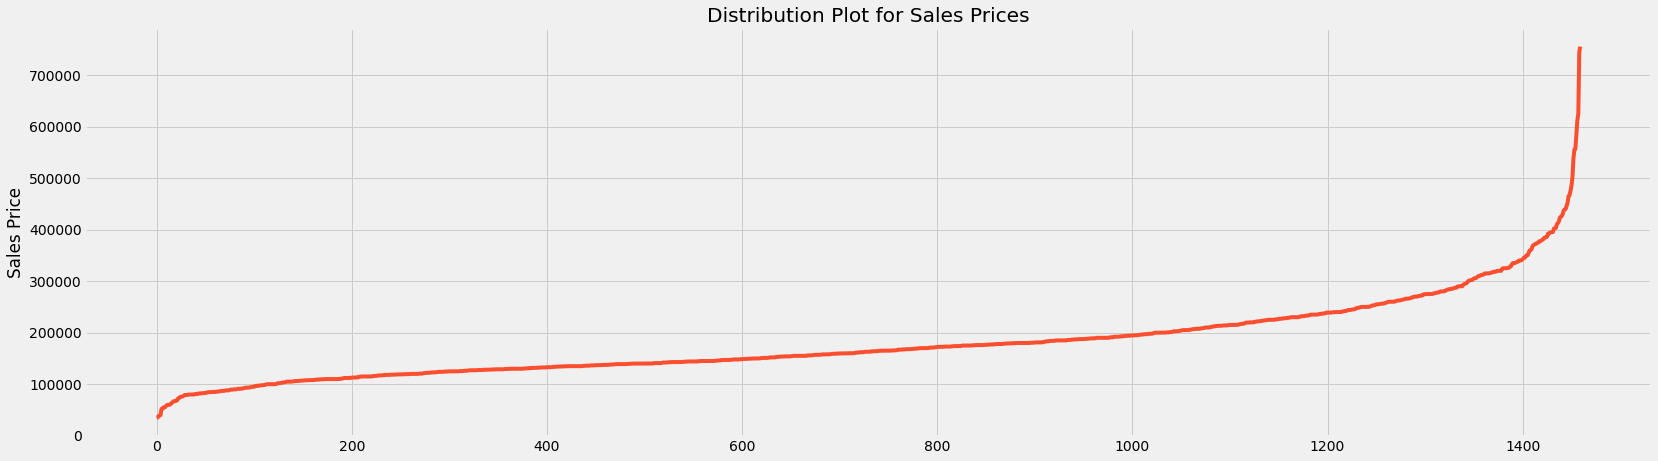

In [6]:
plt.figure(figsize=(25, 7))
plt.plot(train.SalePrice.sort_values().reset_index(drop=True), color=next(color_cycle))
plt.title('Distribution Plot for Sales Prices')
plt.ylabel('Sales Price')

    This is just sale price value distribution in the dataset. (Index values have been reset for sorting)

#### Handling Missing Values

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.isnull()[0:8]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False


<AxesSubplot:>

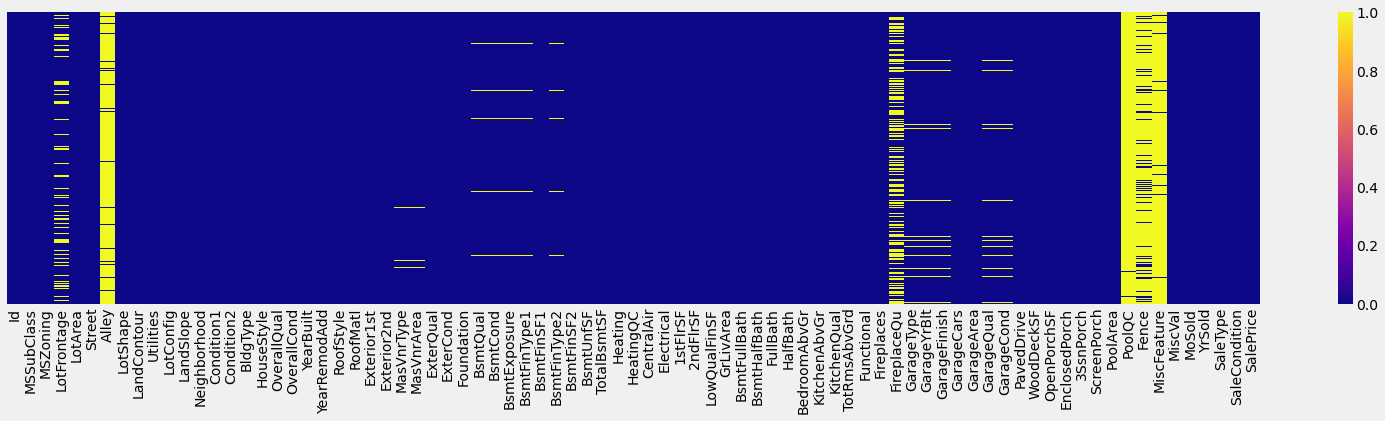

In [9]:
plt.figure(figsize=(25, 5))
sns.heatmap(train.isnull(), yticklabels=False, cmap='plasma')
# sns.heatmap(train.isnull()[0:5], yticklabels=False, cmap='plasma')
# sns.heatmap(train.iloc[:, 0:5].isnull(), yticklabels=False, cmap='plasma')


    Looks like a lot of rows are missing from some features. These features will be dropped as they will have negligible impact on the dependent variable.

In [10]:
# Getting total number of columns with null values 
train_null_val_ncols = (train.isnull().any() == True).sum()
train_null_val_ncols

19

In [11]:
train.shape

(1460, 81)

In [12]:
train.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [13]:
# Getting total number of null values each column and sorting
train.isnull().sum().sort_values(ascending=False)[0:train_null_val_ncols]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


    Handling null values of columns.

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

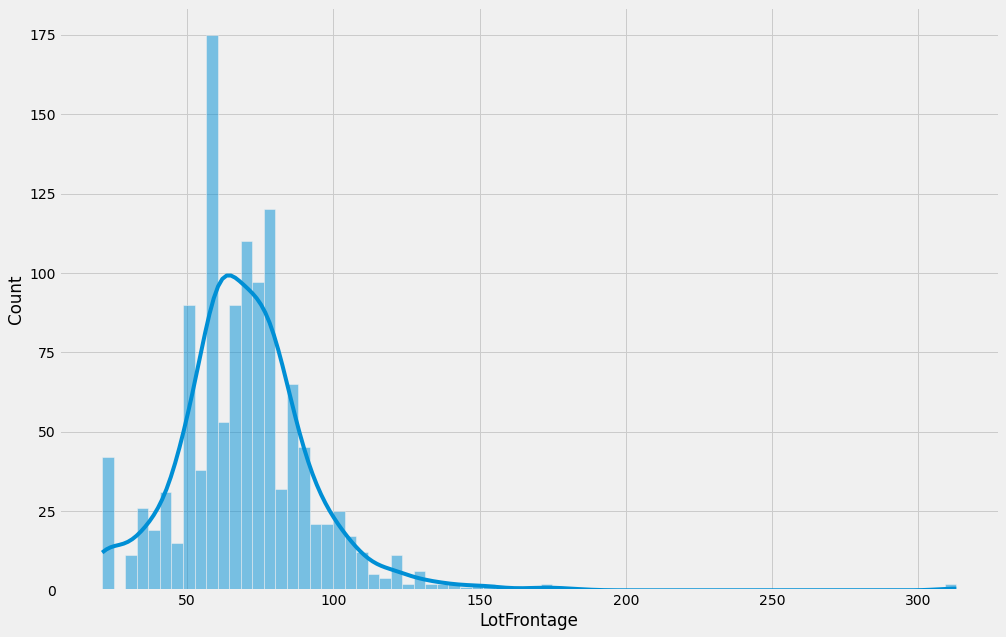

In [14]:
# LotFrontage
# train.LotFrontage.hist(kde=True)
plt.figure(figsize=(15, 10))
sns.histplot(train.LotFrontage, kde=True)

In [15]:
train.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [16]:
# Since 75% of data is less than 80 and 50% of data is less than 69. Therefore replacing null values with mean
train.LotFrontage = train.LotFrontage.fillna(train.LotFrontage.mean())

# Doing the same for test dataset.
test.LotFrontage = test.LotFrontage.fillna(test.LotFrontage.mean())

In [17]:
# Alley
train.Alley.value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [18]:
# Dropping the whole column
test.drop(columns=['Alley'], inplace=True)
train.drop(columns=['Alley'], inplace=True)


    Dropping GarageYrBuilt now but check what can be done (Make dynamic program for values of cols(remove dynamically))

In [19]:
list_numeric = ['GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature']

for col in list_numeric:
    train.drop(columns=col, inplace=True)
    test.drop(columns=col, inplace=True)


    Create subplots for all columns based on condition for category (also check for numeric)

In [90]:
train.LotFrontage.dtype

dtype('float64')



Performing the same technique for all below mentioned columns. (Getting cat cols solved below. in 1hotencoding)

    - BsmtCond, BsmtQual, FirePlaceQu, GarageType, GarageCond, GarageFinish, GarageQual



In [21]:
train.BsmtCond.value_counts(dropna=False)

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [22]:
test.BsmtCond = test.BsmtCond.fillna(test.BsmtCond.mode()[0])
train.BsmtCond = train.BsmtCond.fillna(train.BsmtCond.mode()[0])


Taking mode for all categorical features like BsmtCond
 

In [23]:
list_cat = ['BsmtQual', 'FireplaceQu', 'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual', 'MasVnrType', 'MasVnrArea',
            'BsmtExposure', 'BsmtFinType2']

In [24]:
for col in list_cat:
    test[col] = test[col].fillna(test[col].mode()[0])
    train[col] = train[col].fillna(train[col].mode()[0])

Handling remaining missing values

In [25]:
(train.isnull().any() == True).sum()

2

In [26]:
train.isnull().sum().sort_values(ascending=False)[0:8]

BsmtFinType1    37
Electrical       1
Id               0
HalfBath         0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
dtype: int64

In [27]:
train.dropna(inplace=True)

In [28]:
test.drop(columns=['Id'], inplace=True)
train.drop(columns=['Id'], inplace=True)

In [29]:
# Handling for rest columns in test data
test_null_val_ncols = (test.isnull().any() == True).sum()
test_null_val_ncols

16

In [30]:
test.isnull().sum().sort_values(ascending=False)[0:test_null_val_ncols]

BsmtFinType1    42
MSZoning         4
Functional       2
BsmtFullBath     2
Utilities        2
BsmtHalfBath     2
BsmtFinSF1       1
Exterior1st      1
KitchenQual      1
GarageCars       1
GarageArea       1
Exterior2nd      1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
SaleType         1
dtype: int64

In [31]:
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [32]:
list_numeric2 = ['GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']

list_cat2 = ['BsmtFinType1', 'Utilities', 'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'SaleType', 'Exterior2nd', 
           'Exterior1st', 'KitchenQual']

for item in list_numeric2:
    test[item] = test[item].fillna(test[item].mean())

for item in list_cat2:
    test[item] = test[item].fillna(test[item].mode()[0])

#### Check correlation and drop unwanted columns.

In [33]:
print(test.shape)
print(train.shape) 

(1459, 74)
(1422, 75)


In [34]:
# Checking for missing values if any
print(test.isnull().any().any())
print(train.isnull().any().any())

False
False


#### EDA

In [35]:
# Dataset is ready to explore
fig = px.scatter(train, x=train.index, y='SalePrice', labels={'x':'Index'}, 
                 color=train.MSZoning, template='seaborn', 
                 title='Sale Price distriution ---> MSZoning') 
fig.show()

In [36]:
fig = px.scatter(train, x=train.index, y='SalePrice', labels={'x':'Index'},
                 color=train.Street, template='seaborn',
                 title='Sale Price distriution ---> Street')
fig.show()

Street doesn't seem like a good feature. Still we haven't seen the correlation.

In [37]:
train.LotConfig.unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

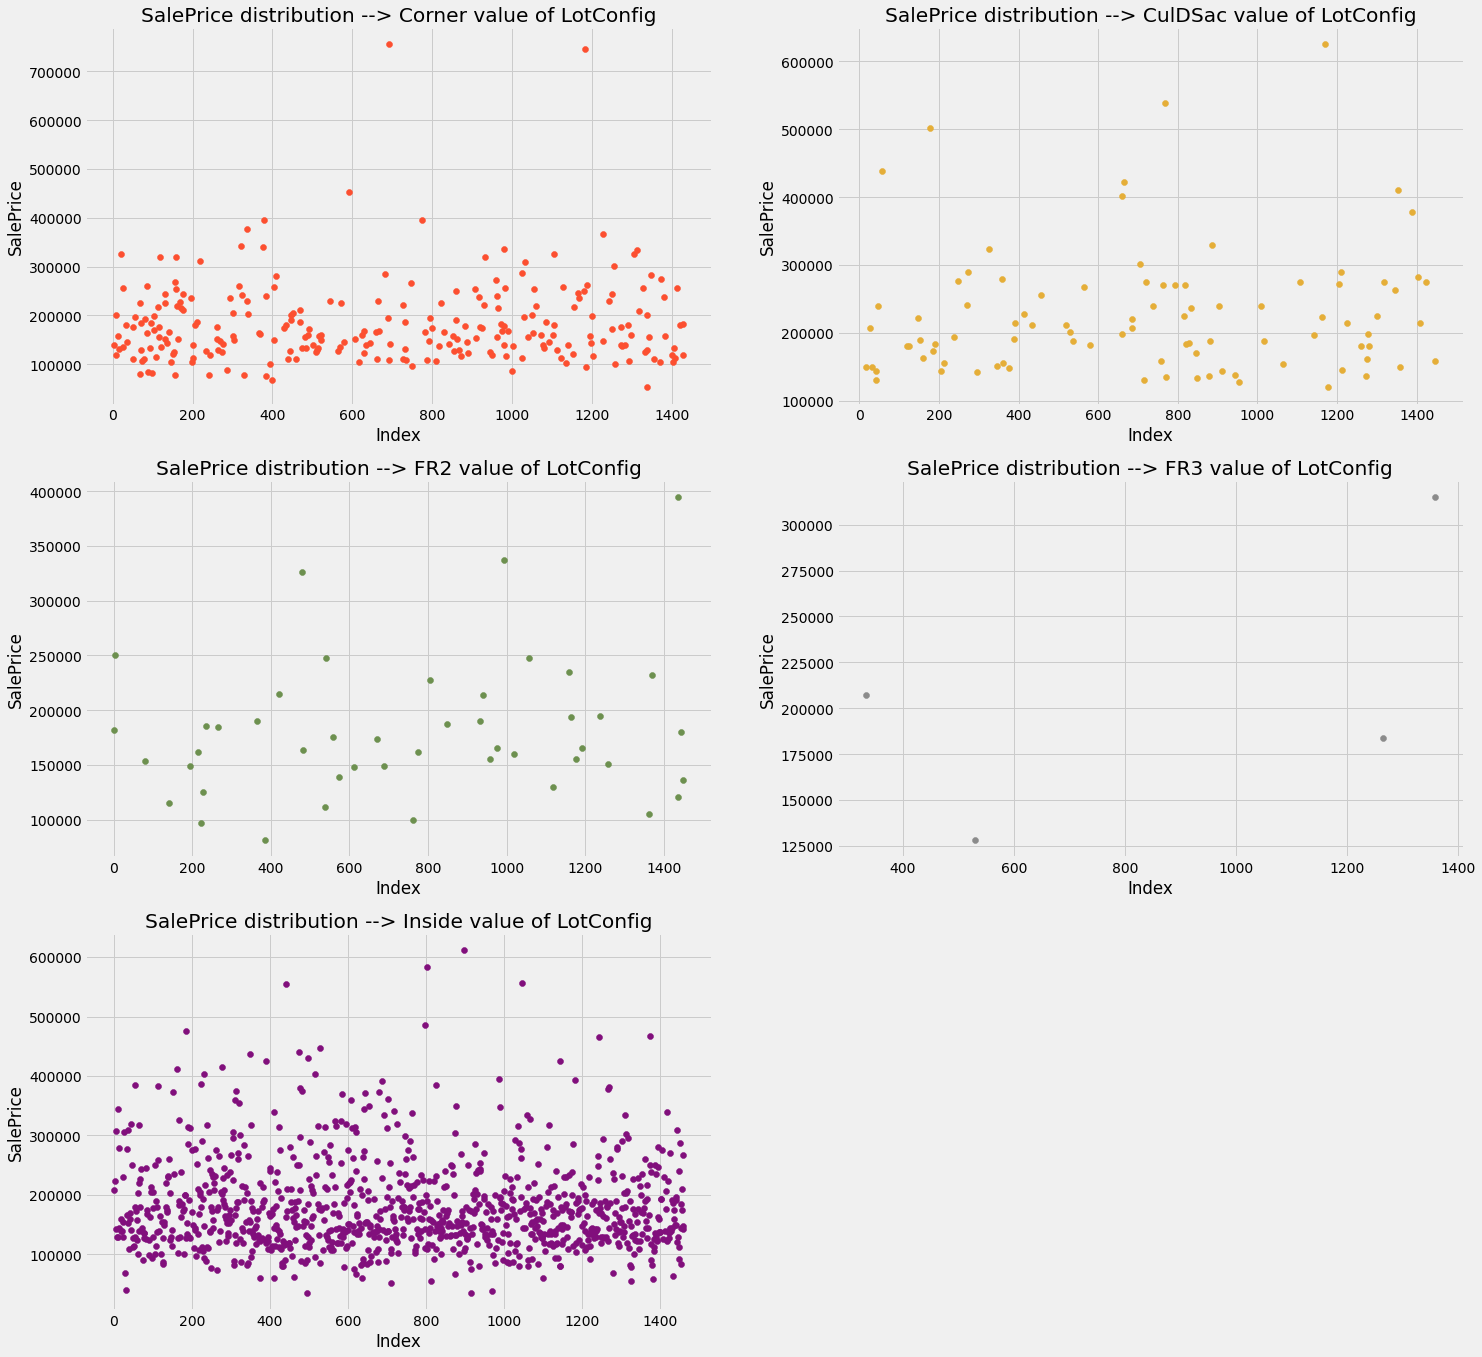

In [91]:
plt.figure(figsize=(22, 22))

n = 1
for cat_name in np.sort(train.LotConfig.unique()):
# for cat_name in np.sort(train.LotConfig):
    
    plt.subplot(3, 2, n)
    plt.xlabel('Index')
    plt.ylabel('SalePrice')
    plt.scatter(x=train[train.LotConfig == cat_name].index,
                y=train[train.LotConfig == cat_name].SalePrice, color=next(color_cycle))
    plt.title('SalePrice distribution --> '+ cat_name +' value of LotConfig')

    n += 1

#### Feature Engineering using OneHotEncoding

In [39]:
final_df = pd.concat([train, test], axis=0)
final_df.shape

(2881, 75)

In [40]:
final_df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [41]:
# Getting categorical columns
for i in final_df.columns:
    if final_df[i].nunique() == 2:
        print(final_df[i].unique())

['Pave' 'Grvl']
['AllPub' 'NoSeWa']
['Y' 'N']


No column with numeric binary values. 

In [42]:
# columns = ['MSZoning', 'Street',
#        'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
#        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
#        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
#        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
#        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
#        'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
#        'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
#        'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [43]:
cat_col_df = final_df.select_dtypes(include=['object'])
cat_columns = list(cat_col_df.columns)

In [44]:
len(cat_columns)

39

In [45]:
final_df.shape

(2881, 75)

In [46]:
# Getting the no. of columns that will be increased after applying one hot encoding to categorical columns
total_enc_cols = 0
for col in cat_columns:
    total_enc_cols += (final_df[col].nunique() - 1) # Subtracting 1 beacause we will be using drop_first=True
print(total_enc_cols)

199


In [47]:
# Total no. of columns after encoding should be..
total_enc_cols + (final_df.shape[1] - len(cat_columns)) # Adding numeric columns and Subtracting encoded parent columns

235

In [48]:
# Encoding categorical features
encoded_df = pd.get_dummies(final_df, columns=cat_columns, drop_first=True)
# df1=pd.get_dummies(final_df[fields],drop_first=True, prefix=fields)
encoded_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [49]:
encoded_df.shape

(2881, 235)

In [101]:
test.shape[0]

1459

In [102]:
train.shape[0]

1422

In [107]:
1459+1422

2881

In [108]:
1459-1422

37

In [106]:
2881-1459

1422

In [111]:
# Separating train and test data (Taking original dataset rows for train and test)
train_final = encoded_df.iloc[:1422, :]
test_final = encoded_df.iloc[1422:, :]
# test_final = encoded_df.iloc[test.shape[0]:, :]
# train_final = encoded_df.iloc[:train.shape[0], :]

In [138]:
encoded_df['SalePrice'].isna().sum()

1459

In [153]:
test_final[['LotArea','OverallQual', 'OverallCond', 'SalePrice']].head(2)

,LotArea,OverallQual,OverallCond,SalePrice
0,11622,5,6,NaN
1,14267,6,6,NaN


In [148]:
test_final.shape

(1459, 235)

In [154]:
train_final[['LotArea','OverallQual', 'OverallCond', 'SalePrice']].tail(2)

,LotArea,OverallQual,OverallCond,SalePrice
1458,9717,5,6,142125.0
1459,9937,5,6,147500.0


In [149]:
train_final.shape

(1422, 235)

In [113]:
# Creating train and test data
X_train_final = train_final.drop(['SalePrice'], axis=1)
y_train_final = train_final['SalePrice']

X_test_final = test_final.drop(['SalePrice'], axis=1)

## Building models

#### 0. Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

# Not standardised data
# Splitting the dataset as training and testing dataset (Optional: Splitting the train set into train and test sets)
# X_train, X_test, y_train, y_test = train_test_split(X_train_final, y_train_final, test_size=0.4, random_state=0)

#### 1. Linear Regression

In [202]:
from sklearn.linear_model import LinearRegression

# Building the model
linreg = LinearRegression()
# linreg.fit(X_train, y_train)
linreg.fit(X_train_final, y_train_final) # Using only the train dataset. 

# Accuracy
print('R-Squared Value for Training Set: {:.3f}'.format(linreg.score(X_train_final, y_train_final)))
# print('R-Squared Value for Test Set: {:.3f}'.format(linreg.score(X_test, y_test)))

y_pred = linreg.predict(X_test_final)

R-Squared Value for Training Set: 0.930


#### 2. KNN Regression

In [198]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 2)
# knnreg.fit(X_train, y_train)
knnreg.fit(X_train_final, y_train_final)

print('R-squared train score: {:.3f}'.format(knnreg.score(X_train_final, y_train_final)))
# print('R-squared test score: {:.3f}'.format(knnreg.score(X_test, y_test)))

y_pred = knnreg.predict(X_test_final)

R-squared train score: 0.873


#### 3.1 Ridge Regression

In [193]:
from sklearn.linear_model import Ridge

ridge = Ridge()
# ridge.fit(X_train, y_train)
ridge.fit(X_train_final, y_train_final)

print('R-squared score (training): {:.3f}'.format(ridge.score(X_train_final, y_train_final)))
# print('R-squared score (test): {:.3f}'.format(ridge.score(X_test, y_test)))

y_pred = ridge.predict(X_test_final)

R-squared score (training): 0.906


In [194]:
y_pred

array([101322.24296717, 140338.68418286, 174424.2868652 , ...,
       157921.51243894,  97359.73376985, 221042.6293081 ])

In [195]:
test.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal


In [196]:
train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500


#### 3.2 Ridge Regression using Feature Normalization

'alpha' is a regularization parameter, we will use different values ranging from 1, 5, 10 to 100. 
There is a huge impact of 'alpha' on the model.

In [191]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

ridge = Ridge(alpha=30)
ridge.fit(X_train_scaled, y_train_final)

print('R-squared score (training): {:.3f}'.format(ridge.score(X_train_scaled, y_train_final)))
# print('R-squared score (test): {:.3f}'.format(ridge.score(X_test_scaled, y_test)))

y_pred = ridge.predict(X_test_final)

R-squared score (training): 0.861


#### 4. Lasso Regression

In [167]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=30, max_iter=9000)
lasso.fit(X_train_final, y_train_final)

print('R-squared score (training): {:.3f}'.format(lasso.score(X_train_final, y_train_final)))
# print('R-squared score (test): {:.3f}'.format(lasso.score(X_test, y_test)))

y_pred = lasso.predict(X_test_final)

R-squared score (training): 0.904


In [168]:
# On normalized data
lasso = Lasso(alpha=100, max_iter=9000)
lasso.fit(X_train_scaled, y_train_final)

print('R-squared score (training): {:.3f}'.format(lasso.score(X_train_scaled, y_train_final)))
# print('R-squared score (test): {:.3f}'.format(lasso.score(X_test_scaled, y_test)))

y_pred = lasso.predict(X_test_final)

R-squared score (training): 0.890


#### Trained models are created 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

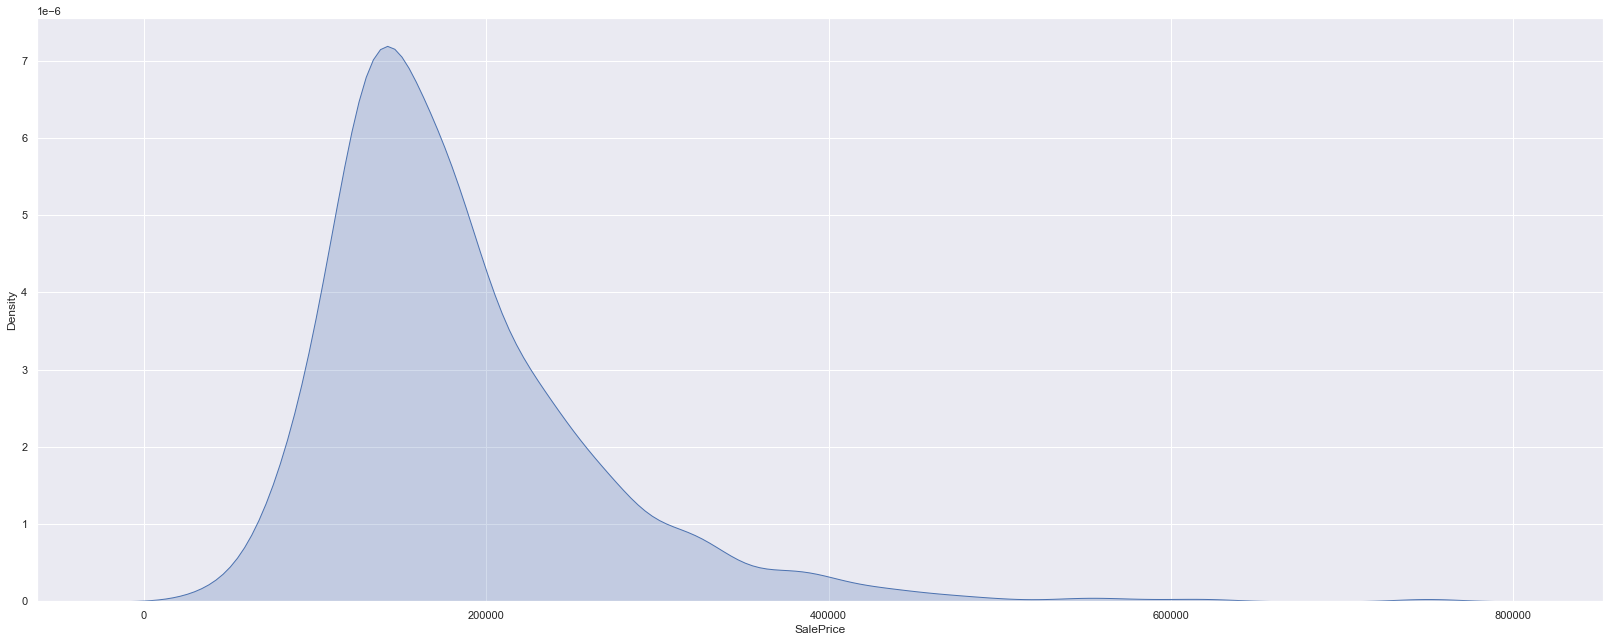

In [209]:
# Basic Linear Regression Model is giving highest accuracy 
# Plotting to check distribuition of SalesPrice
plt.figure(figsize=(25, 10))
sns.set(style='darkgrid')
sns.kdeplot(data = y_train_final, shade = True)

<AxesSubplot:ylabel='Density'>

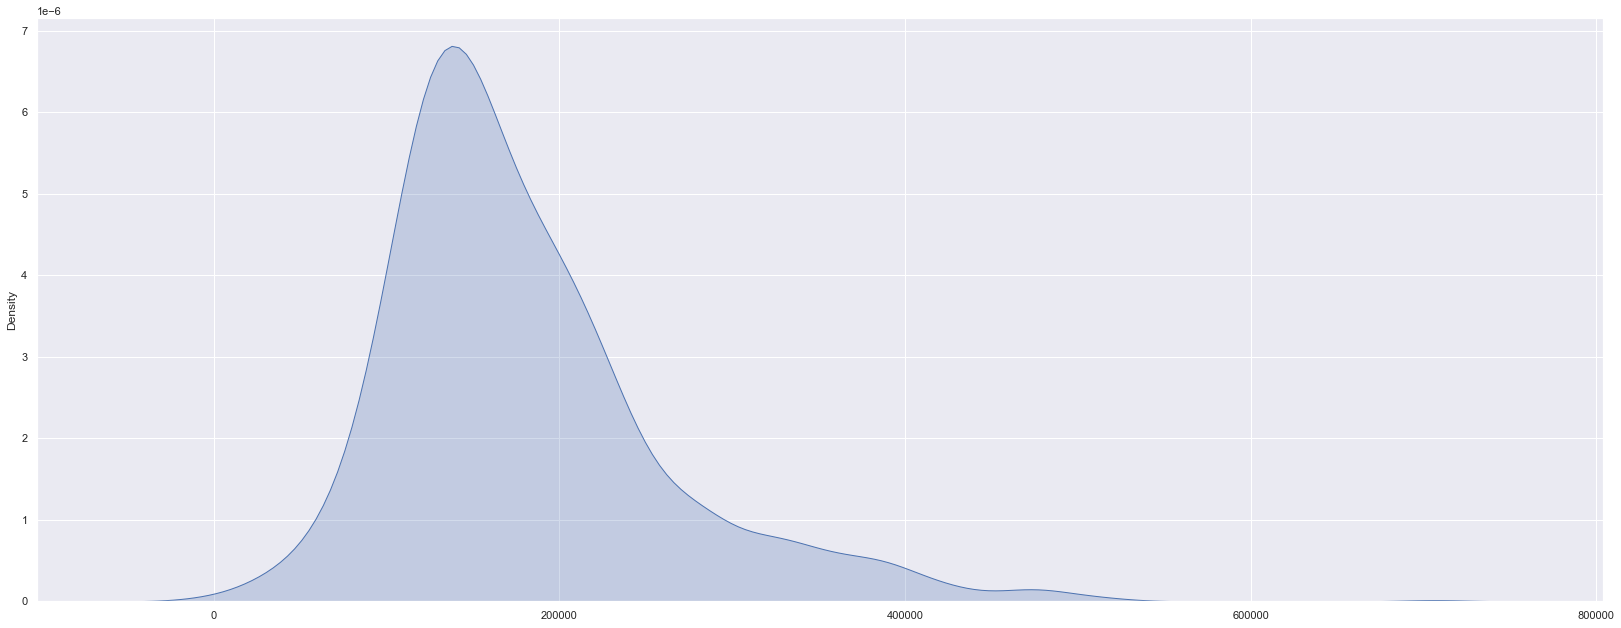

In [207]:
plt.figure(figsize=(25, 10))
sns.set(style='darkgrid')
sns.kdeplot(data = y_pred, shade = True)

### Distribution of data is similar